# Lymph Node Time and TRE Analysis

This notebook analyzes the relationship between task duration and Target Registration Error (TRE) for lymph node registration tasks performed by radiologists. The analysis helps evaluate radiologist performance and understand how time spent on tasks correlates with registration accuracy.

## 1. Import Required Libraries

First, we'll import all the necessary libraries for data analysis and visualization.

In [12]:
from typing import Dict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import custom analysis functions
import analysis_functions as af
import create_results_table_from_log as create_results
import all_evaluations

# Set matplotlib style for better-looking plots
# plt.style.use('default')
# sns.set_palette("husl")

path_radiologists = r"/home/fryderyk/Downloads/study_results"

participants: Dict[str, Dict[str, int | bool | str]] = {
    "rad_test": {
        "group": 1,
        "experienced": False,
    },
    "rad_1": {
        "group": 1,
        "experienced": False,
    },
    "rad_2": {
        "group": 1,
        "experienced": True,
    },
    "rad_3": {
        "group": 2,
        "experienced": False,
    }
}
for rad_id in participants.keys():
    participants[rad_id]['path_rt'] = f"{path_radiologists}/{rad_id}"
    participants[rad_id]['path_log'] = f"{participants[rad_id]['path_rt']}/{rad_id}.log"

path_gt = r"/home/fryderyk/Downloads/SerielleCTs_nii_forHumans_annotations"

# create_results.main(path_gt, participants)


## 2. Load and Prepare Data

Load the radiologist performance data from the CSV file and examine its structure.

In [57]:
# Load the results CSV file
df = pd.read_csv('results.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nUnique users: {df['user_id'].unique()}")

# Show first few rows
df.head()

Dataset shape: (720, 44)

Columns: ['user_id', 'experienced', 'group', 'patient_id', 'transform_type', 'task_id', 'task_index', 'duration_seconds', 'a_vertebralis_r_rel', 'a_vertebralis_r_abs_5', 'a_vertebralis_l_rel', 'a_vertebralis_l_abs_5', 'a_carotisexterna_r_rel', 'a_carotisexterna_r_abs_5', 'a_carotisexterna_l_rel', 'a_carotisexterna_l_abs_5', 'lymph_node_abs', 'lymph_node_tre_linear', 'lymph_node_tre_nonlinear', 'recurrence', 'slider_total_distance_mm', 'slider_usage_count', 'pan_total_distance_px', 'pan_usage_count', 'zoom_total_distance_px', 'zoom_usage_count', 'window_level_total_distance_px', 'window_level_usage_count', 'drag_scroll_total_distance_px', 'drag_scroll_usage_count', 'wheel_scroll_distance_c', 'double_click_Red1_count', 'double_click_Red2_count', 'double_click_Green1_count', 'double_click_Green2_count', 'double_click_Yellow1_count', 'double_click_Yellow2_count', 'synchronised_count', 'arrow_key_Red1_count', 'arrow_key_Red2_count', 'arrow_key_Green1_count', 'arrow

,user_id,experienced,group,patient_id,transform_type,task_id,task_index,duration_seconds,a_vertebralis_r_rel,a_vertebralis_r_abs_5,...,double_click_Green2_count,double_click_Yellow1_count,double_click_Yellow2_count,synchronised_count,arrow_key_Red1_count,arrow_key_Red2_count,arrow_key_Green1_count,arrow_key_Green2_count,arrow_key_Yellow1_count,arrow_key_Yellow2_count
0,rad_1,False,1,calibration_1_start_0e5fp8GltvE,TransformType.NONLINEAR,a_vertebralis_r,task_idx_0021,47.370,0.953747,True,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,rad_1,False,1,calibration_1_start_0e5fp8GltvE,TransformType.NONLINEAR,a_vertebralis_l,task_idx_0022,39.287,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,rad_1,False,1,calibration_1_start_0e5fp8GltvE,TransformType.NONLINEAR,a_carotisexterna_r,task_idx_0023,36.094,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,rad_1,False,1,calibration_1_start_0e5fp8GltvE,TransformType.NONLINEAR,a_carotisexterna_l,task_idx_0024,34.272,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,rad_1,False,1,calibration_1_start_0e5fp8GltvE,TransformType.NONLINEAR,lymph_node,task_idx_0025,92.516,NaN,NaN,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


## Bifurcations


### Bifurcations by transform type

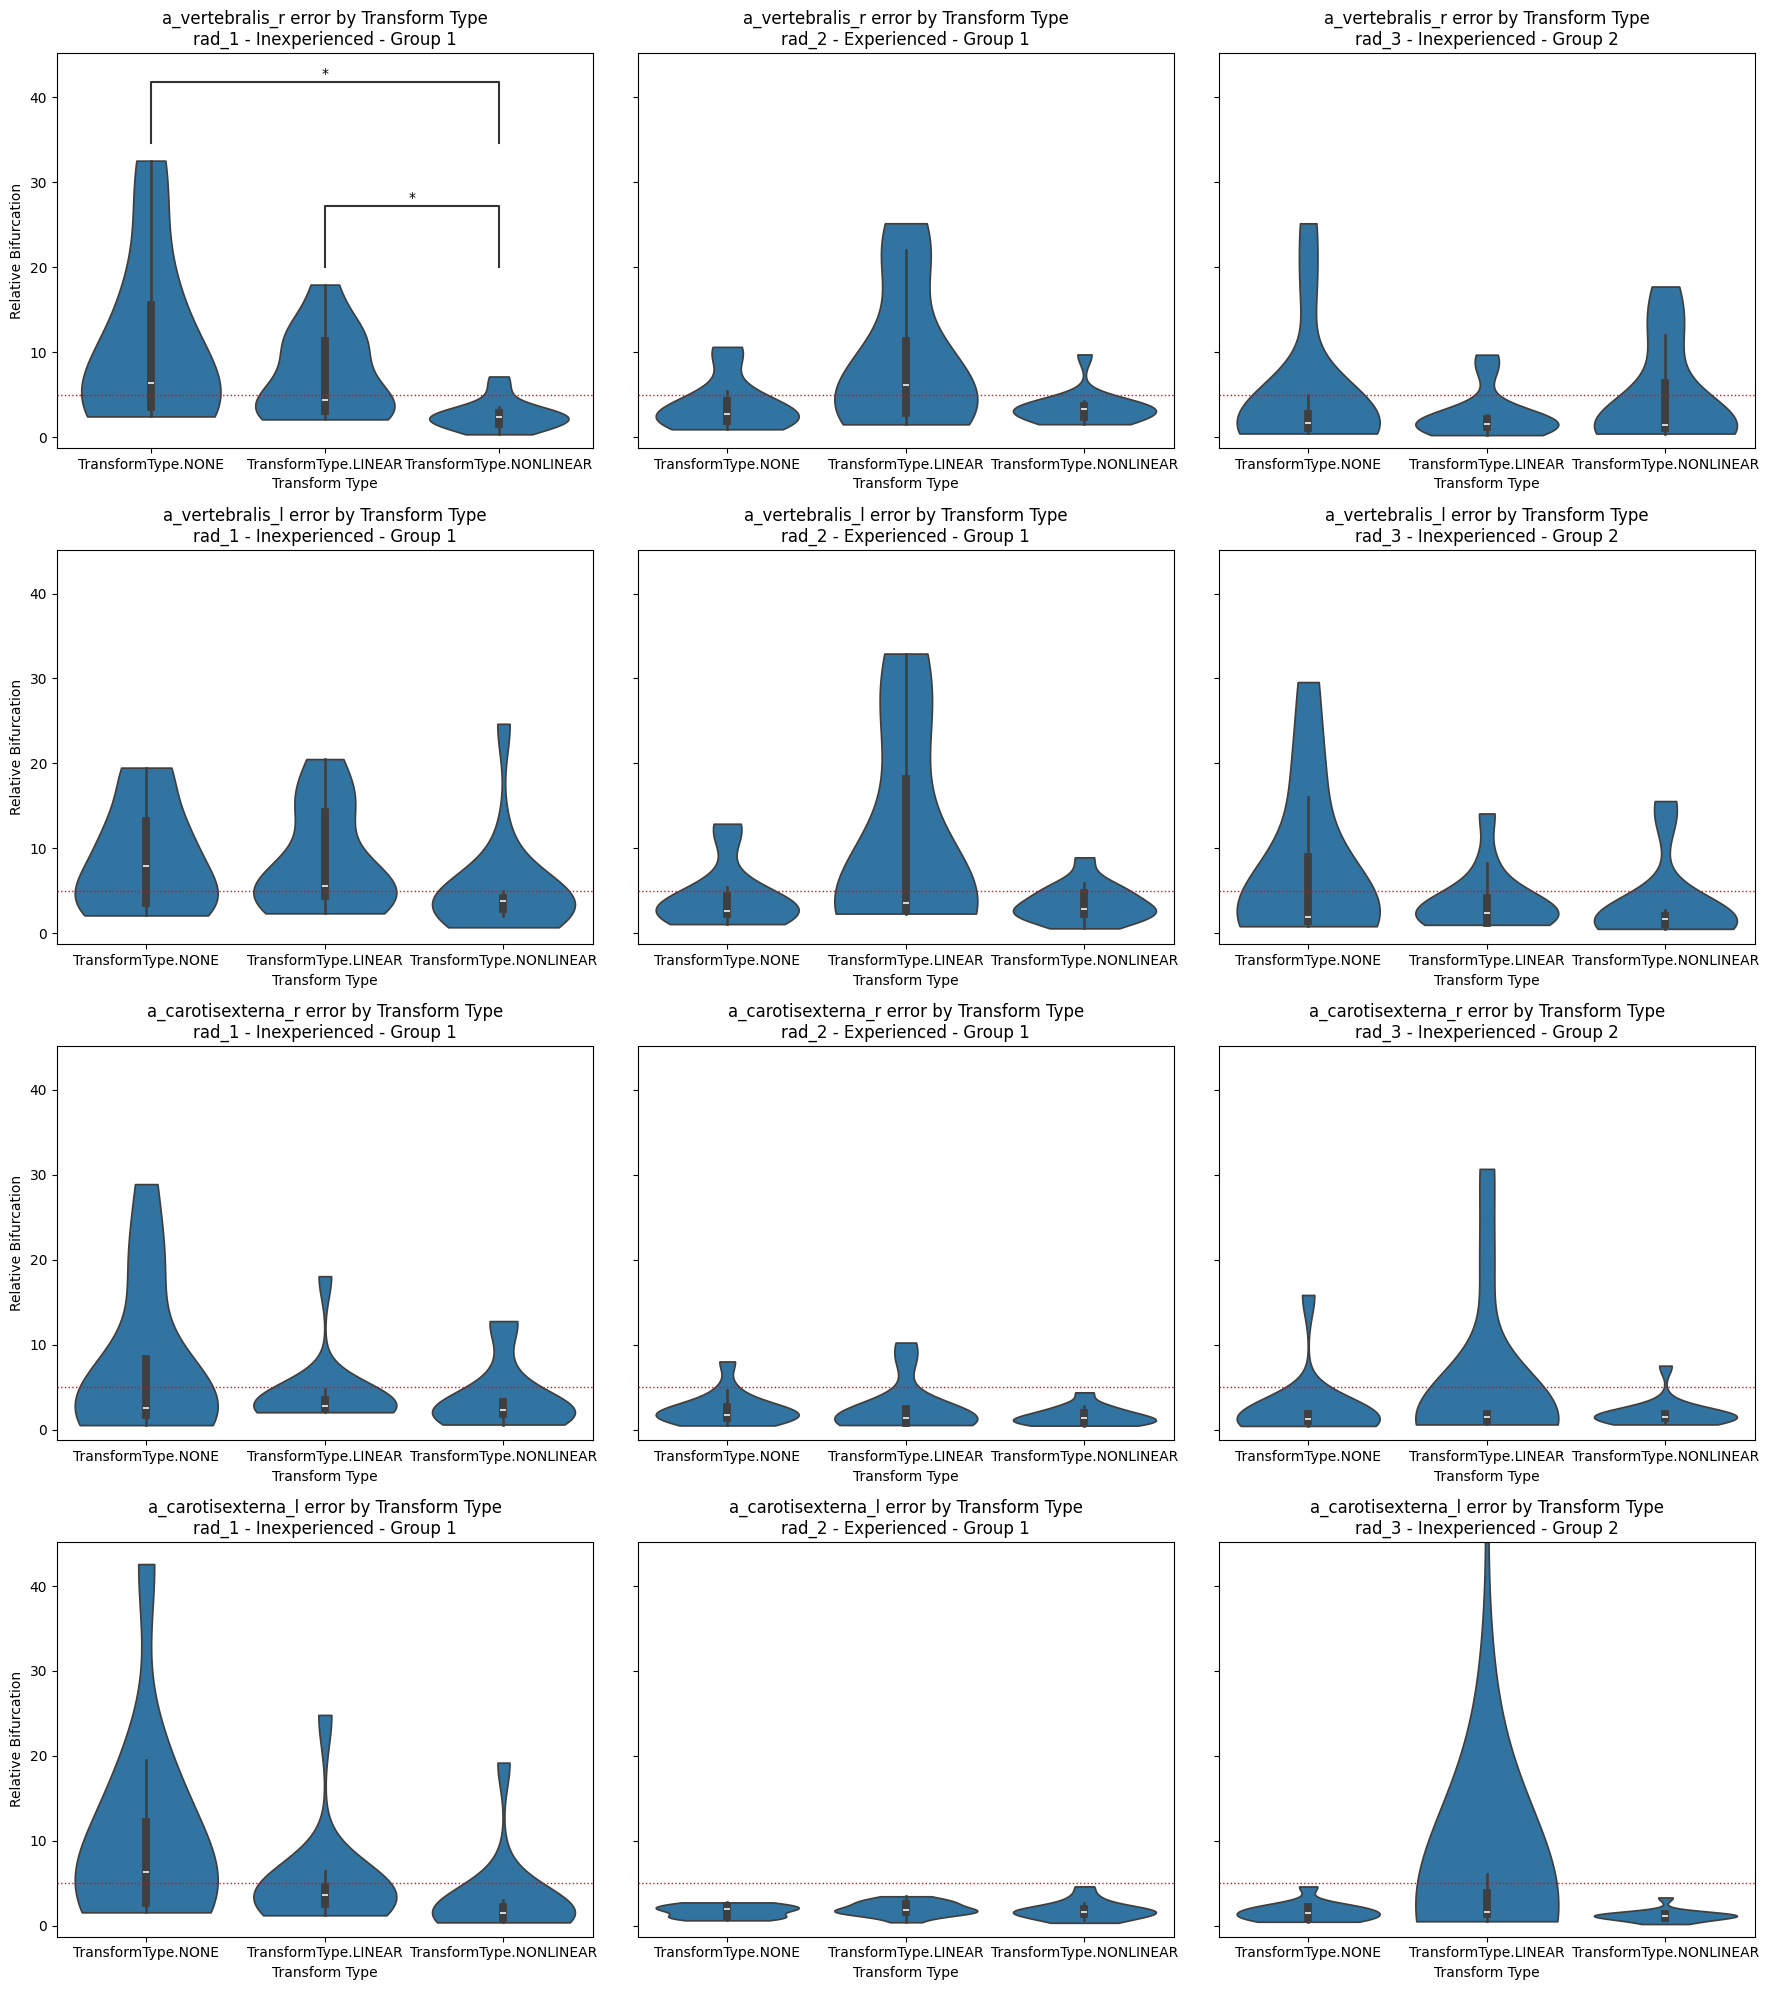

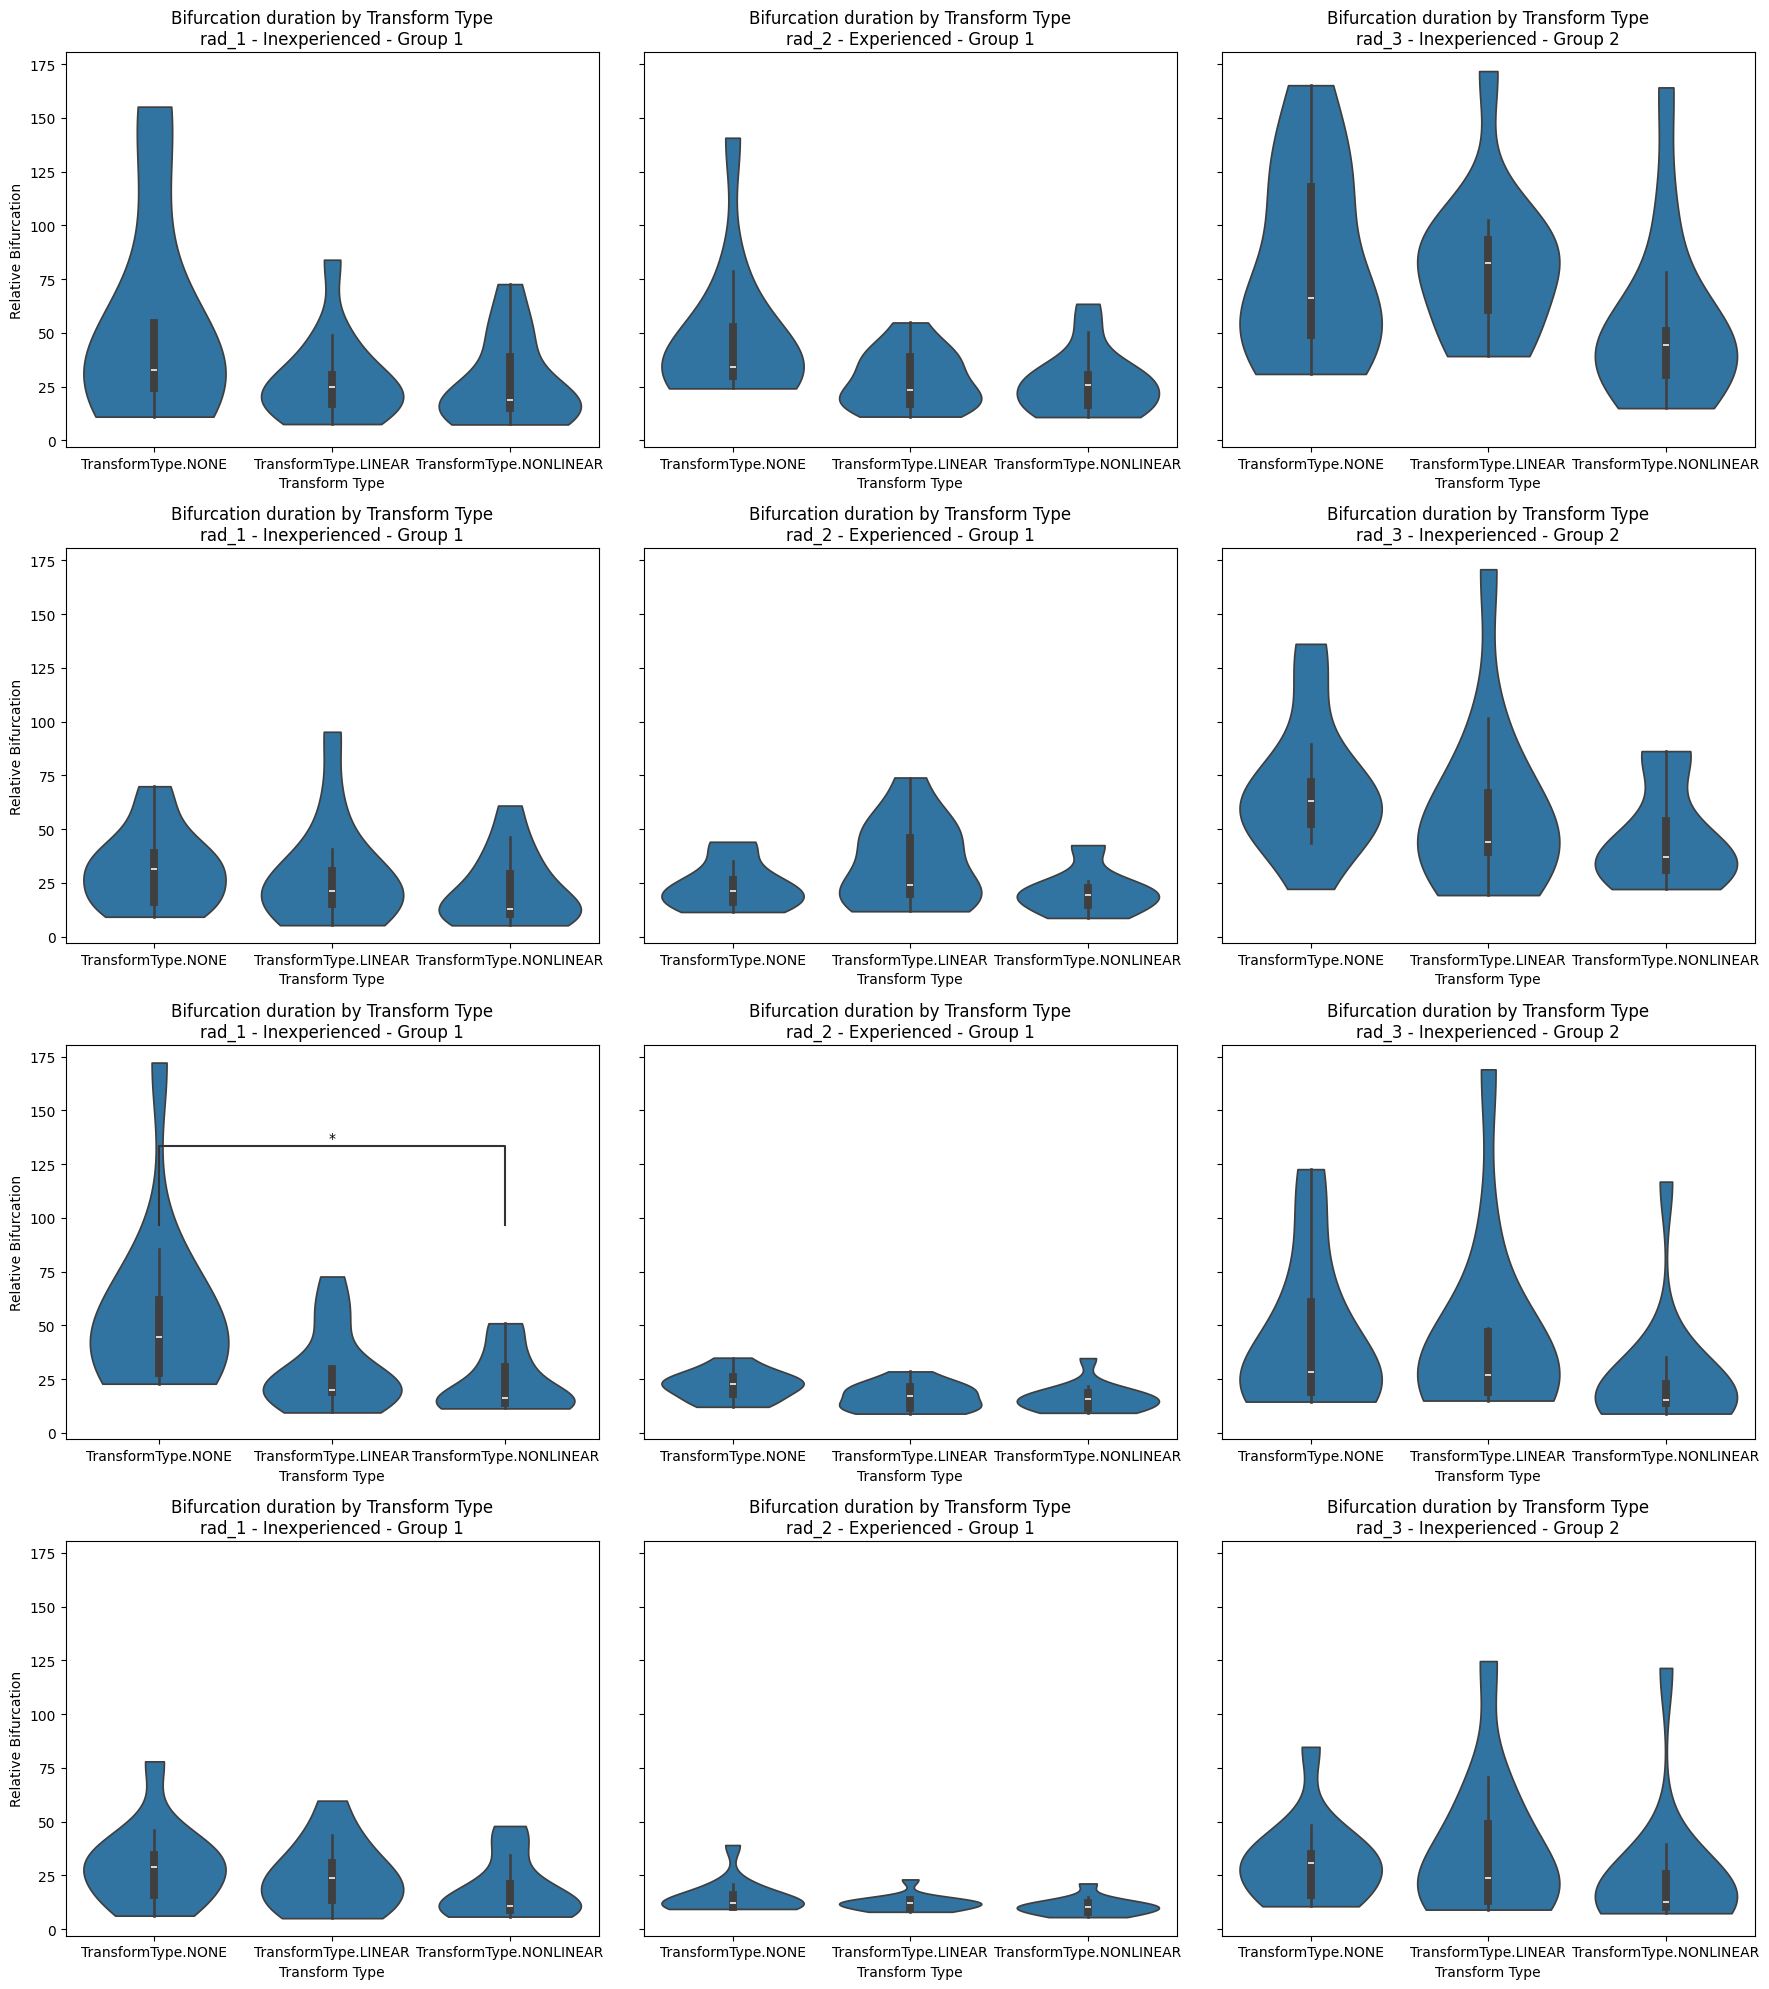

In [15]:
import importlib
importlib.reload(all_evaluations)


all_evaluations.plot_all_bifurcation_by_transform(df, significance=True, value='error')
all_evaluations.plot_all_bifurcation_by_transform(df, significance=True, value='duration')




## Recurrence

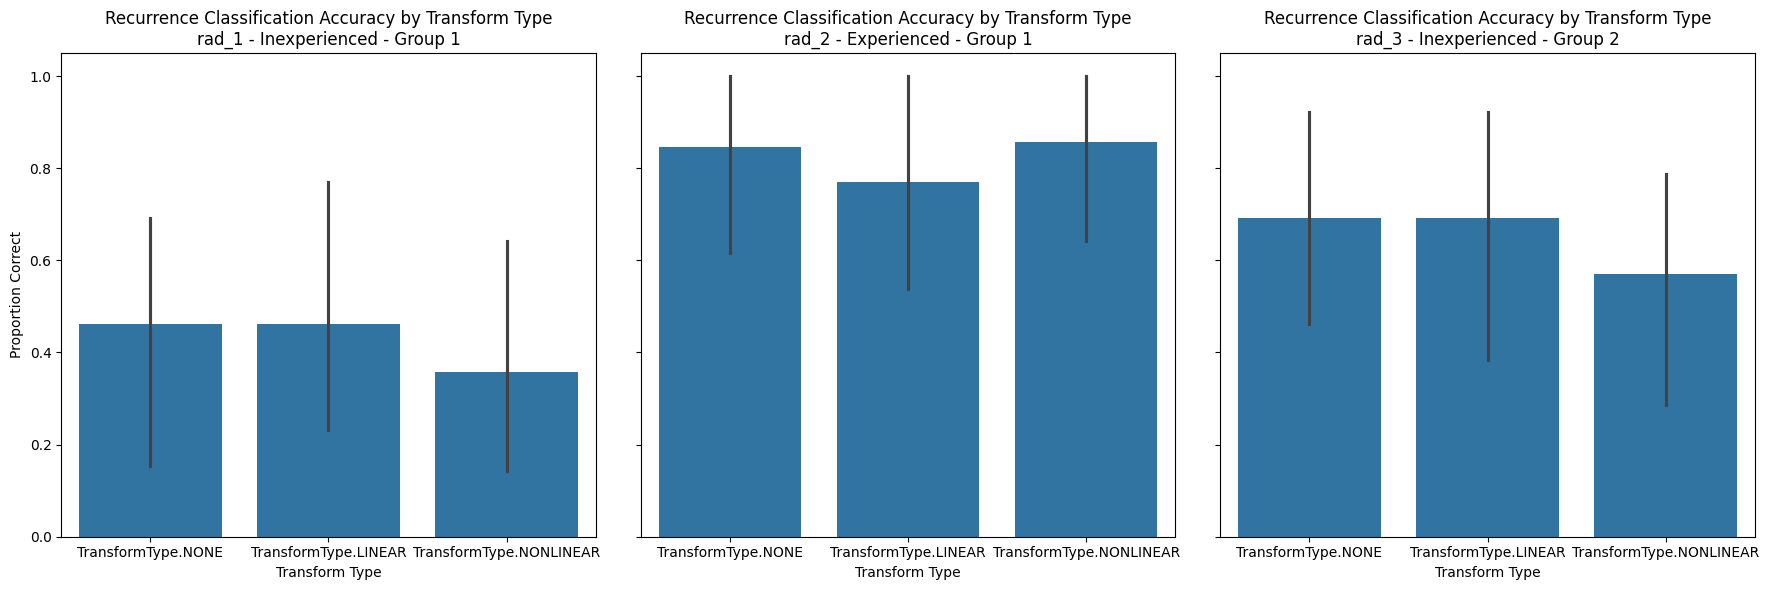

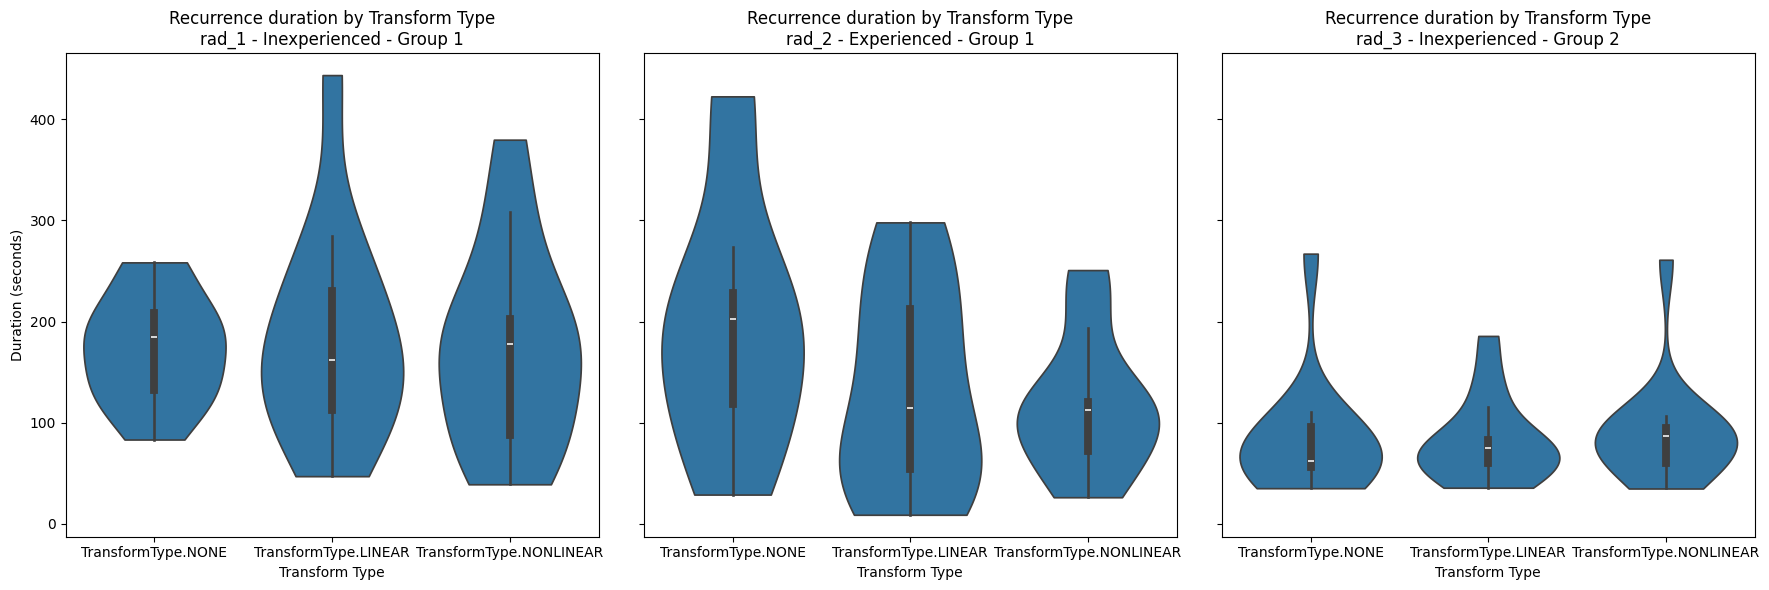

In [40]:
import importlib
importlib.reload(all_evaluations)


all_evaluations.plot_all_recurrence_by_transform(
    df, significance=True, value="accuracy")

all_evaluations.plot_all_recurrence_by_transform(
    df, significance=True, value="duration")

## 3. Generate Lymph Node Time and TRE Plot

Create a visualization showing the relationship between task duration and Target Registration Error (TRE) for lymph node registration tasks. The plot displays both metrics on the same graph, with cases sorted by duration or tre from highest to lowest.

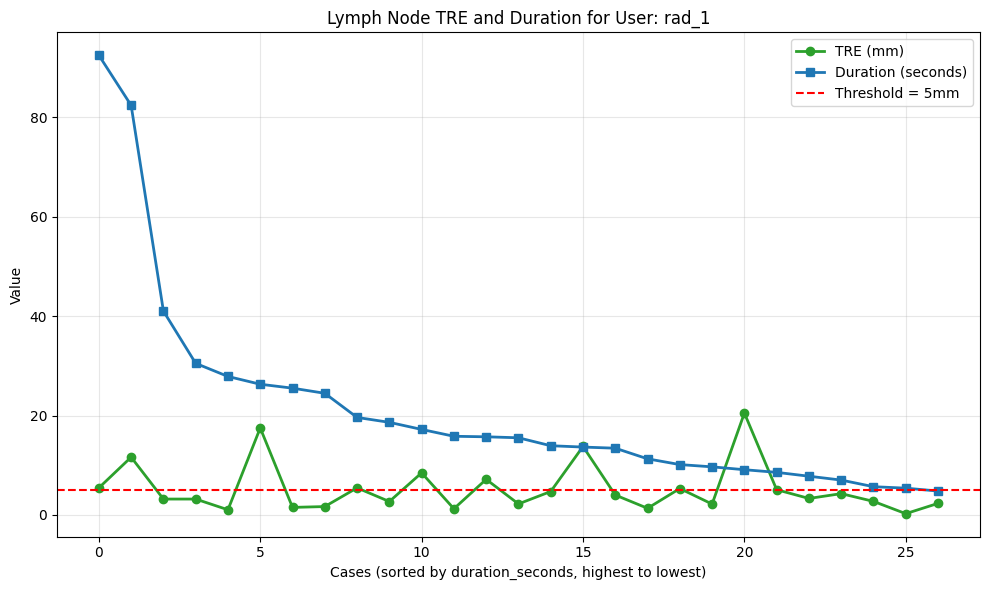

In [16]:
# Generate the plot for 'rad_test' user
af.plot_lymph_node_time_and_tre(df, 'rad_1', sort_by='duration_seconds')

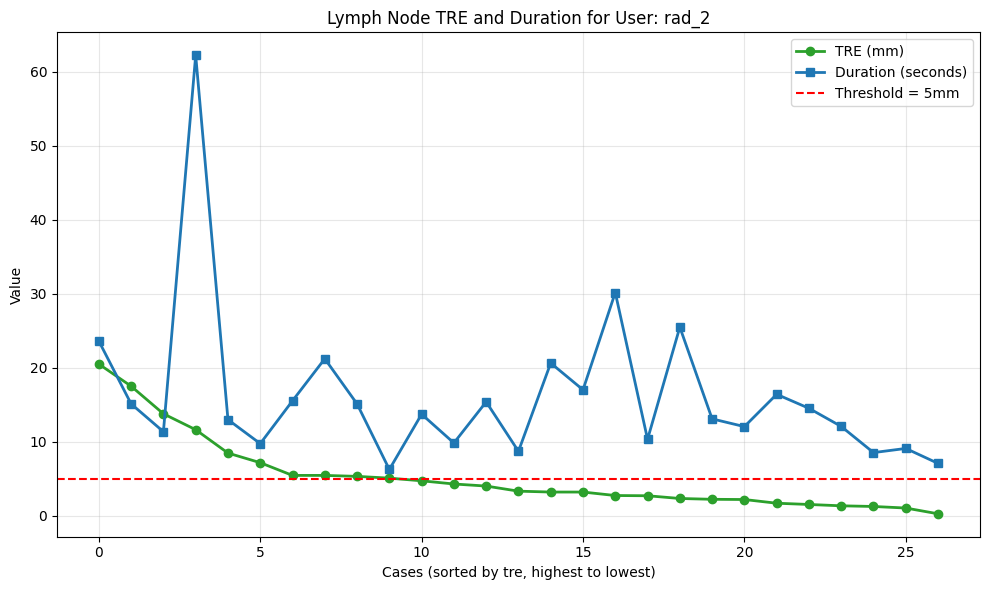

In [ ]:
# Generate the plot for 'rad_1' user for comparison
af.plot_lymph_node_time_and_tre(df, 'rad_2', 'duration_seconds')

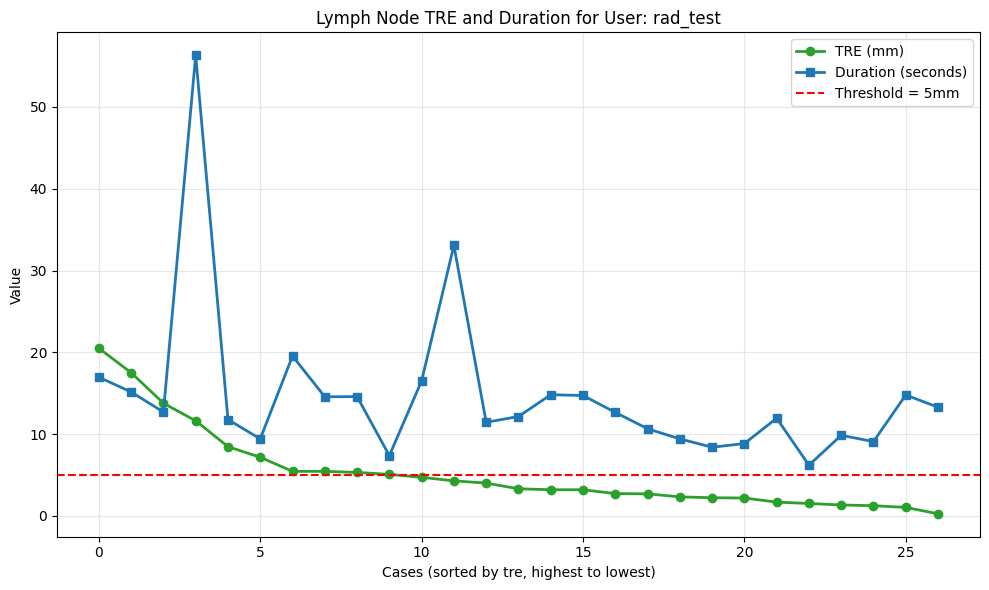

In [ ]:
# Generate the plot for 'rad_1' user for comparison
af.plot_lymph_node_time_and_tre(df, 'rad_test', 'duration_seconds')

## Across Groups

### Bifurcations

/home/fryderyk/Documents/code/study-evaluation/all_evaluations.py:583: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot_df['transform_type'] = pd.Categorical(
/home/fryderyk/Documents/code/study-evaluation/all_evaluations.py:583: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot_df['transform_type'] = pd.Categorical(
/home/fryderyk/Documents/code/study-evaluation/all_evaluations.py:583: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot_df['transform_type'] = pd.Categorical(


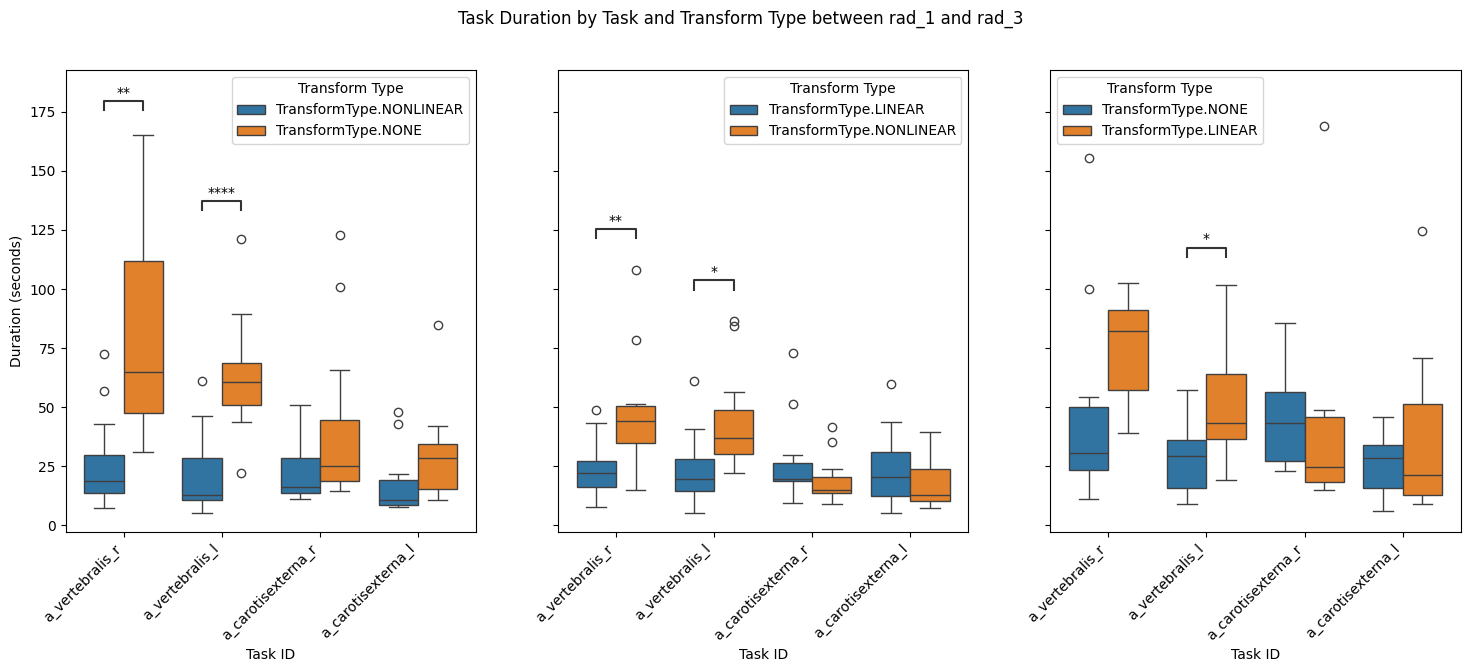

In [75]:
import importlib
importlib.reload(all_evaluations)


all_evaluations.plot_all_bifurcation_by_transforma_cross_groups(
    df, significance=True, value='error')